# Questions
1. Is there a relation between income inequality and wealth inequality? (2d scatterplot)
2. What countries has the highest and lowest social progress? (2 countryIDs)
3. World average is given for wealth inequality, find the world average for income inequality? (1 int)
4. Create a histogram for social progress. (Histogram)
5. Create a histogram for income inequality. (Histogram)
6. Create a histogram for wealth inequality. (Histogram)
7. What is the relation between income inequality and social progress? (2d scatterplot)
8. What is the relation between wealth inequality and social progress? (2d scatterplot)
9. What is the variance and standard deviation for income inequality, wealth inequality and social progress? (6 ints)
10. Find the relation between income inequality, wealth inequality and social progress. (3d scatterplot)

3 2d scatterplots,
3 Histograms,
1 3d scatterplot,
7 graphs total

1 max function,
1 min function,
1 avg function,
3 var functions,
3 stdev functions,
9 aggerate functions total

4 inner joins (for scatter plots)

In [24]:
import numpy as np
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt


mydb_connection = mysql.connector.connect(
  host="localhost",
  user="root",
  password="password",
  database="mydatabase"
)

SELECT WealthGini, Most_Recent_Income_Gini FROM countries JOIN wealthgini ON countries.CountryID =        wealthgini.CountryID JOIN incomegini ON countries.CountryID = incomegini.CountryID

           WealthGini Most_Recent_Income_Gini
2               0.731                    51.3
3               0.637                    33.2
4  0.7959999999999999                    32.5
5               0.768                    41.4
6  0.6629999999999999                    34.4


<IPython.core.display.Javascript object>


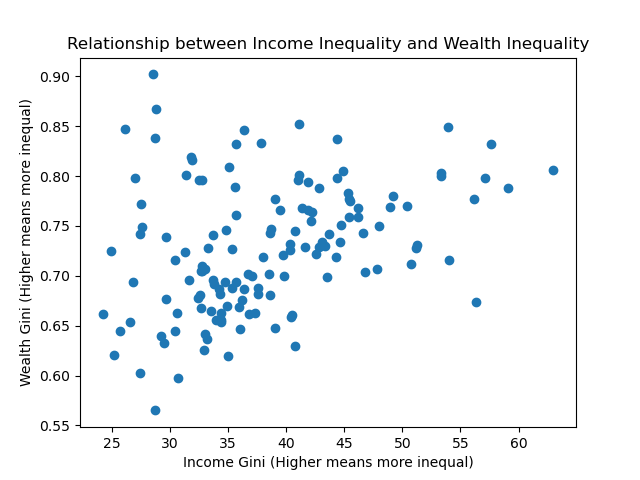

Text(0.5, 1.0, 'Relationship between Income Inequality and Wealth Inequality')

In [50]:
#Question 1
sql = "SELECT WealthGini, Most_Recent_Income_Gini FROM countries JOIN wealthgini ON countries.CountryID = \
       wealthgini.CountryID JOIN incomegini ON countries.CountryID = incomegini.CountryID"

dataframe = pd.read_sql(sql, mydb_connection)
dataframe = dataframe[dataframe.WealthGini != ""]
dataframe = dataframe[dataframe.Most_Recent_Income_Gini != ""]

print(sql)
print()
print(dataframe.head())

incomegini = dataframe["Most_Recent_Income_Gini"].tolist()
x = [float(i) for i in incomegini]

wealthgini = dataframe["WealthGini"].tolist()
y = [float(i) for i in wealthgini]

plt.scatter(x,y)
plt.xlabel("Income Gini (Higher means more inequal)")
plt.ylabel("Wealth Gini (Higher means more inequal)")
plt.title("Relationship between Income Inequality and Wealth Inequality")


As we see there is some heteroskedasticity in the data that I could not fix with log transformations, so I decided to leave the data as is. There is some relationship between income inequality and wealth inequality however not as much as you would think. This is because some nations with very low-income inequality have some of the highest wealth inequality. Once example is Norway’s which has a highest wealth inequality compared to one of the lowest income inequalities. This can be due to several reasons such as high credit access and more matured wealth piles in families. The following video explains in more depth; https://www.youtube.com/watch?v=Ot4qdCs54ZE

In [41]:
#Questions 2

sql1 = 'SELECT CountryID, socialProgressIndex FROM socialindexs WHERE (socialProgressIndex = \
                (SELECT MAX(socialProgressIndex) FROM socialindexs WHERE socialProgressIndex != ""))'
sql2 = 'SELECT CountryID, socialProgressIndex FROM socialindexs WHERE (socialProgressIndex = \
                (SELECT MIN(socialProgressIndex) FROM socialindexs WHERE socialProgressIndex != ""))'
        
Max = pd.read_sql(sql1, mydb_connection)
Min = pd.read_sql(sql2, mydb_connection)

print(sql1)
print(sql2)
print()
print(Max)
print(Min)


SELECT CountryID, socialProgressIndex FROM socialindexs WHERE (socialProgressIndex =                 (SELECT MAX(socialProgressIndex) FROM socialindexs WHERE socialProgressIndex != ""))
SELECT CountryID, socialProgressIndex FROM socialindexs WHERE (socialProgressIndex =                 (SELECT MIN(socialProgressIndex) FROM socialindexs WHERE socialProgressIndex != ""))

   CountryID socialProgressIndex
0        176   93.08000183105469
   CountryID socialProgressIndex
0        215    29.8700008392334


In [42]:
#Question 3
sql = "SELECT AVG(Most_Recent_Income_Gini) FROM incomegini"
avg = pd.read_sql(sql, mydb_connection)

print(sql)
print()
print(avg)

SELECT AVG(Most_Recent_Income_Gini) FROM incomegini

   AVG(Most_Recent_Income_Gini)
0                     23.982197


In [51]:
#Question 4

sql = 'SELECT socialProgressIndex From socialindexs WHERE socialProgressIndex != ""'
dataframe = pd.read_sql(sql, mydb_connection)

print(sql)
print()
print(dataframe.head())

data = dataframe["socialProgressIndex"].tolist()
data = sorted(data)
plt.hist(data)
plt.xticks([0,162])
plt.ylabel("Frequency")
plt.xlabel("Social Progress Index")
plt.title("Frequency of Social Progress Index in Countries")
plt.show()


SELECT socialProgressIndex From socialindexs WHERE socialProgressIndex != ""

  socialProgressIndex
0   93.08000183105469
1   92.08000183105469
2   92.08000183105469
3   91.94000244140625
4   91.62000274658203


<IPython.core.display.Javascript object>

As we can see they are no big variation between the data because the socialProgressIndex is created from country rankings not an objective standard therefor they is no difference in the height of the bins

SELECT Most_Recent_Income_Gini From incomegini WHERE Most_Recent_Income_Gini != ""

  Most_Recent_Income_Gini
0                    51.3
1                    33.2
2                    32.5
3                    41.4
4                    34.4


<IPython.core.display.Javascript object>


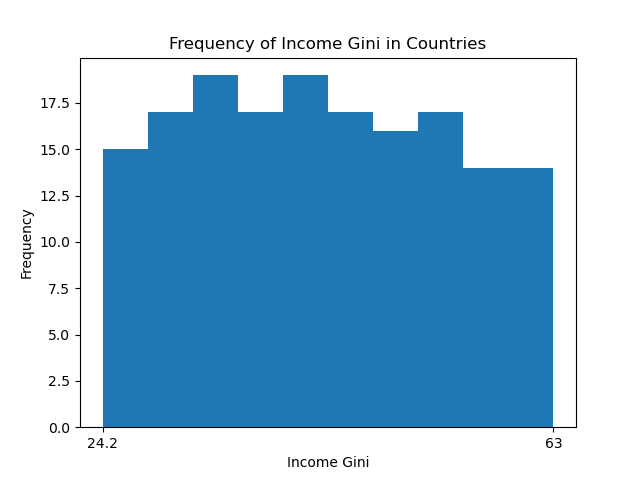

In [52]:
#Question 5

sql = 'SELECT Most_Recent_Income_Gini From incomegini WHERE Most_Recent_Income_Gini != ""'
dataframe = pd.read_sql(sql, mydb_connection)

print(sql)
print()
print(dataframe.head())

data = dataframe["Most_Recent_Income_Gini"].tolist()
data = sorted(data)
plt.hist(data)
plt.xticks([0,127])
plt.ylabel("Frequency")
plt.xlabel("Income Gini")
plt.title("Frequency of Income Gini in Countries")
plt.show()

In [53]:
#Question 6

sql = 'SELECT WealthGini From wealthgini WHERE WealthGini != ""'
dataframe = pd.read_sql(sql, mydb_connection)

print(sql)
print()
print(dataframe.head())

data = dataframe["WealthGini"].tolist()
data = sorted(data)
plt.hist(data)
plt.xticks([0,123])
plt.ylabel("Frequency")
plt.xlabel("Wealth Gini")
plt.title("Frequency of Wealth Gini Index in Countries")
plt.show()

SELECT WealthGini From wealthgini WHERE WealthGini != ""

           WealthGini
0               0.885
1               0.655
2               0.637
3  0.7490000000000001
4               0.731


<IPython.core.display.Javascript object>

SELECT socialProgressIndex, Most_Recent_Income_Gini FROM countries JOIN socialindexs ON countries.CountryID =         socialindexs.CountryID JOIN incomegini ON countries.CountryID = incomegini.CountryID

  socialProgressIndex Most_Recent_Income_Gini
1   47.65999984741211                    51.3
2   75.69999694824219                    33.2
4   70.62999725341797                    32.5
5   80.83000183105469                    41.4
6    75.0199966430664                    34.4


<IPython.core.display.Javascript object>


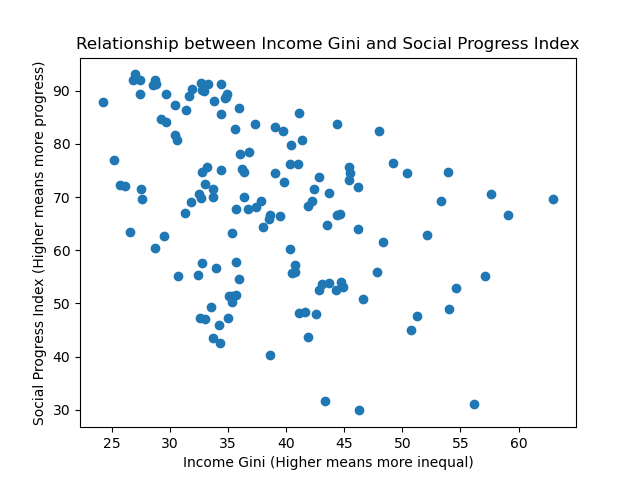

In [54]:
#Question 7

sql = "SELECT socialProgressIndex, Most_Recent_Income_Gini FROM countries JOIN socialindexs ON countries.CountryID = \
        socialindexs.CountryID JOIN incomegini ON countries.CountryID = incomegini.CountryID"

dataframe = pd.read_sql(sql, mydb_connection)
dataframe = dataframe[dataframe.socialProgressIndex != ""]
dataframe = dataframe[dataframe.Most_Recent_Income_Gini != ""]

print(sql)
print()
print(dataframe.head())

incomegini = dataframe["Most_Recent_Income_Gini"].tolist()
x = [float(i) for i in incomegini]

wealthgini = dataframe["socialProgressIndex"].tolist()
y = [float(i) for i in wealthgini]

plt.scatter(x,y)
plt.xlabel("Income Gini (Higher means more inequal)")
plt.ylabel("Social Progress Index (Higher means more progress)")
plt.title("Relationship between Income Gini and Social Progress Index")
plt.show()

In [56]:
#Question 8

sql = "SELECT socialProgressIndex, WealthGini FROM countries JOIN socialindexs ON countries.CountryID = \
        socialindexs.CountryID JOIN wealthgini ON countries.CountryID = wealthgini.CountryID"

dataframe = pd.read_sql(sql, mydb_connection)
dataframe = dataframe[dataframe.socialProgressIndex != ""]
dataframe = dataframe[dataframe.WealthGini != ""]

print(sql)
print()
print(dataframe.head())

incomegini = dataframe["WealthGini"].tolist()
x = [float(i) for i in incomegini]

wealthgini = dataframe["socialProgressIndex"].tolist()
y = [float(i) for i in wealthgini]

plt.scatter(x,y)
plt.xlabel("Wealth Gini (Higher means more inequal)")
plt.ylabel("Social Progress Index (Higher means more progress)")
plt.title("Relationship between Wealth Gini and Social Progress Index")
plt.show()

SELECT socialProgressIndex, WealthGini FROM countries JOIN socialindexs ON countries.CountryID =         socialindexs.CountryID JOIN wealthgini ON countries.CountryID = wealthgini.CountryID

  socialProgressIndex          WealthGini
0   42.34000015258789               0.655
1   47.65999984741211               0.731
2   75.69999694824219               0.637
3   70.62999725341797  0.7959999999999999
4   80.83000183105469               0.768


<IPython.core.display.Javascript object>

In [48]:
#Question 9

sql = "SELECT variance(Most_Recent_Income_Gini), stddev(Most_Recent_Income_Gini), variance(WealthGini), stddev(WealthGini), \
        variance(socialProgressIndex), stddev(socialProgressIndex) FROM incomegini, wealthgini, socialindexs"
print(sql)
print()
data = pd.read_sql(sql, mydb_connection)
data

SELECT variance(Most_Recent_Income_Gini), stddev(Most_Recent_Income_Gini), variance(WealthGini), stddev(WealthGini),         variance(socialProgressIndex), stddev(socialProgressIndex) FROM incomegini, wealthgini, socialindexs



,variance(Most_Recent_Income_Gini),stddev(Most_Recent_Income_Gini),variance(WealthGini),stddev(WealthGini),variance(socialProgressIndex),stddev(socialProgressIndex)
0,383.993888,19.595762,0.027081,0.164563,787.958151,28.070592


SELECT socialProgressIndex, Most_Recent_Income_Gini, WealthGini FROM countries JOIN socialindexs ON         countries.CountryID = socialindexs.CountryID JOIN incomegini ON countries.CountryID = incomegini.CountryID         JOIN wealthgini ON countries.CountryID = wealthgini.CountryID

  socialProgressIndex Most_Recent_Income_Gini          WealthGini
1   47.65999984741211                    51.3               0.731
2   75.69999694824219                    33.2               0.637
3   70.62999725341797                    32.5  0.7959999999999999
4   80.83000183105469                    41.4               0.768
5    75.0199966430664                    34.4  0.6629999999999999


<IPython.core.display.Javascript object>


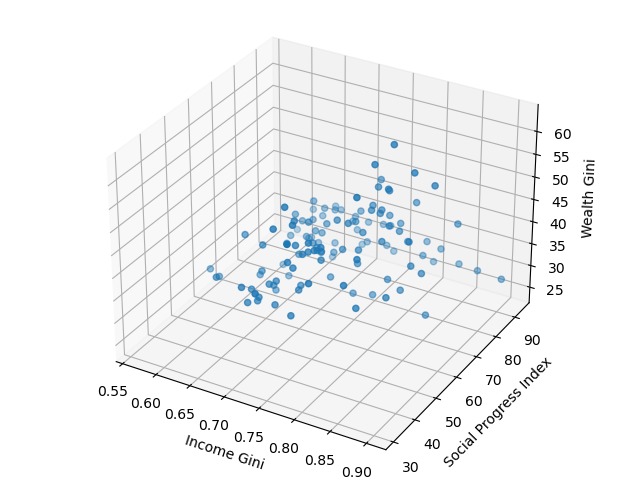

In [60]:
#Question 10

%matplotlib notebook
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import time

sql = "SELECT socialProgressIndex, Most_Recent_Income_Gini, WealthGini FROM countries JOIN socialindexs ON \
        countries.CountryID = socialindexs.CountryID JOIN incomegini ON countries.CountryID = incomegini.CountryID \
        JOIN wealthgini ON countries.CountryID = wealthgini.CountryID"

dataframe = pd.read_sql(sql, mydb_connection)
dataframe = dataframe[dataframe.socialProgressIndex != ""]
dataframe = dataframe[dataframe.WealthGini != ""]
dataframe = dataframe[dataframe.Most_Recent_Income_Gini != ""]

print(sql)
print()
print(dataframe.head())

socialindex = dataframe["socialProgressIndex"].tolist()
income = [float(i) for i in socialindex]

incomegini = dataframe["Most_Recent_Income_Gini"].tolist()
social = [float(i) for i in incomegini]

wealthgini = dataframe["WealthGini"].tolist()
wealth = [float(i) for i in wealthgini]

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(wealth, income, social)
ax.set_xlabel("Income Gini")
ax.set_ylabel("Social Progress Index")
ax.set_zlabel("Wealth Gini")

plt.show()